# Сборный проект-1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

### Получение общей информации о данных

Прочитаем датафрейм из файла и посмотрим общую информацию, начало и конец датафрейма

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df= pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


При первоначальном осмотре данных выявлены следующие проблемы:
* Необходимо привести названия столбцов к змеиному регистру
* Возможно, типы данных требуют изменения
* Встречаются пропущенные данные
* Возможно, встречаются дубликаты

## Подготовка данных

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
  * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  * Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Изменение названий столбцов

Приведем названия столбцов к змеиному регистру

In [6]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Оценим количество соотношение пропущенных данных в каждом столбце

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### name

Проверим пропуски в столбце name

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как нет возможности восстановить эти данные, но они могут мешать анализу, лучше их удалить

In [9]:
df = df.dropna(subset=['name'])
len(df[df['name'].isna()])

0

In [10]:
df['name'].value_counts()

Need for Speed: Most Wanted              12
Ratatouille                               9
LEGO Marvel Super Heroes                  9
Madden NFL 07                             9
FIFA 14                                   9
                                         ..
J-League Pro Soccer Club wo Tsukurou!     1
Elvandia Story                            1
Akiba's Trip Plus                         1
Super Robot Taisen MX Portable            1
Castlevania Dracula X                     1
Name: name, Length: 11559, dtype: int64

#### year_of_release

Проверим пропуски в столбце year_of_release

In [11]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Игры выпускались с 1980 по 2016 год  
Посмотрим, сколько игр имеют пропущенный год выпуска

In [12]:
nan_years_names = list(df.loc[df['year_of_release'].isna()]['name'].unique())
len(nan_years_names)

232

Возможно, в датафрейме есть информация об играх с таким же названием, но под другую платформу?  
Часто игры под разные платформы выпускают в один год, например, The Elder Scrolls V: Skyrim был выпущен 11 ноября 2011 года для Windows, Playstation 3 и Xbox 360  
Попробуем составить список имен из списка с пропусками и соответствующих годов выпуска

In [13]:
name_year = df.filter(['name', 'year_of_release']).query('name in @nan_years_names')\
.dropna(subset=['year_of_release']).drop_duplicates(subset='name').reset_index(drop=True)

name_year

,name,year_of_release
0,Call of Duty: Black Ops,2010.0
1,Madden NFL 06,2005.0
2,Madden NFL 07,2006.0
3,Sonic the Hedgehog,1991.0
4,Namco Museum,2001.0
...,...,...
94,Majesty 2: The Fantasy Kingdom Sim,2009.0
95,Star Trek: Legacy,2006.0
96,Aquaman: Battle for Atlantis,2003.0
97,Dinotopia: The Sunstone Odyssey,2003.0


99 пропусков можно заполнить, уже неплохо

In [14]:
name = name_year['name'].tolist()
year = name_year['year_of_release'].tolist()

*Логичнее использовать словарь, но он почему-то не заработал корректно*

In [15]:
df['year_of_release']=df['year_of_release'].fillna(0)

for i in range(len(name)):

        df.loc[( 
            (df['year_of_release'] ==0 ) & (df['name'] == name[i]) ), 'year_of_release' ] = year[i]

len(df[df['year_of_release']==0])

146

После замены осталось 146 пустых значений, придется их удалить

In [16]:
len(df[df['year_of_release'].isna()])

0

In [17]:
df.loc[df['year_of_release']==0, 'year_of_release'] = np.nan
len(df[df['year_of_release'].isna()])

146

In [18]:
df = df.dropna(subset=['year_of_release'])

#### critic_score

Проверим пропуски в столбце critic_score

In [19]:
len(df[df['critic_score'].isna()])

8492

In [20]:
df['critic_score'].describe()

count    8075.000000
mean       68.991950
std        13.923383
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Пропусков очень много, но на мой взгляд, корректно заполнить значения невозможно, придется оставлять в таком виде

#### user_score

Проверим пропуски в столбце user_score

In [21]:
df['user_score'].describe()

count     9934
unique      96
top        tbd
freq      2394
Name: user_score, dtype: object

In [22]:
len(df[df['user_score'].isna()])

6633

С пропусками ситуация, аналогичная critic_score  
Разберемся со значением tbd

In [23]:
df[df['user_score']=='tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Аббревиатура TBD означает to be determined, подлежит уточнению, т.е эти данные можно заменить на NaN

In [24]:
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan
len(df[df['user_score'].isna()])

9027

Также следует преобразовать данные в числовой тип

In [25]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#### rating

Проверим пропуски в столбце rating

In [26]:
len(df[df['rating'].isna()])

6699

In [27]:
df['rating'].describe()

count     9868
unique       8
top          E
freq      3958
Name: rating, dtype: object

Возможно пойти тем же путем, что и со столбцом year_of_release, и восстановить данные по именам с других платформ

In [28]:
nan_rating_names = list(df.loc[df['rating'].isna()]['name'].unique())
len(nan_rating_names)

5787

In [29]:
name_rating = df.filter(['name', 'rating']).query('name in @nan_rating_names')\
.dropna(subset=['rating']).drop_duplicates(subset='name').reset_index(drop=True)

name_rating.shape[0]

359

In [30]:
name_rating

,name,rating
0,Call of Duty: Ghosts,M
1,The Elder Scrolls V: Skyrim,M
2,Need for Speed Underground 2,E
3,FIFA 14,E
4,Donkey Kong Country Returns,E
...,...,...
354,Puyo Pop Fever,E
355,The Book of Unwritten Tales 2,T
356,Satisfashion,E
357,Banjo-Kazooie,E


359 пропусков можно заполнить

In [31]:
name = name_rating['name'].tolist()
rating = name_rating['rating'].tolist()

In [32]:
df['rating'] = df['rating'].fillna('N/A')

for i in range(len(name)):

        df.loc[( 
            (df['rating'] == 'N/A' ) & (df['name'] == name[i]) ), 'rating' ] = rating[i]

len(df[df['rating'] == 'N/A'])

6262

Чуть меньше пятиста пропусков заполнено, остальные придется оставить как есть  
Посмотрим сами значения

In [33]:
df['rating'].value_counts()

N/A     6262
E       4119
T       3063
M       1644
E10+    1462
EC        10
K-A        4
RP         2
AO         1
Name: rating, dtype: int64

Информация с Википедии:  
* «E» («Everyone») — «Для всех»: содержание вполне подходит для возрастной категории от 6 лет
* «T» («Teen») — «Подросткам»: игра подходит для лиц от 13 лет
* «M» («Mature») — «Для взрослых»: материалы игры не подходят для подростков младше 17 лет.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «EC» («Early childhood») — «Для детей младшего возраста»: игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими
* «K-A» («Kids to Adults») - первоначальное название рейтинга E
* «RP» («Rating Pending») — «Рейтинг ожидается»: продукт был отправлен в ESRB и ожидает присвоения рейтинга
* «AO» («Adults Only 18+») — «Только для взрослых»: содержание игры только для взрослых старше 18 лет.

Можно заменить рейтинг K-A на E, а рейтинг AO на M  

RP заменим на N/A, как и пропуски

Значения с рейтингом EC удалим как выбросы

In [34]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'AO', 'rating'] = 'M'
#df.loc[df['rating'] == 'RP', 'rating'] = 'N/A'
df.loc[df['rating'] == 'EC', 'rating'] = np.nan
df = df.dropna(subset=['name'])

df['rating'].value_counts()

N/A     6262
E       4123
T       3063
M       1645
E10+    1462
RP         2
Name: rating, dtype: int64

### Общие продажи

Добавим столбец общих продаж по всему миру

In [35]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [36]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38


## Анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Количество игр в разные годы

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [37]:
df_year = df.pivot_table(
    index='year_of_release', 
    values='name', 
    aggfunc=['count'])\
    .droplevel(1, axis=1).reset_index()

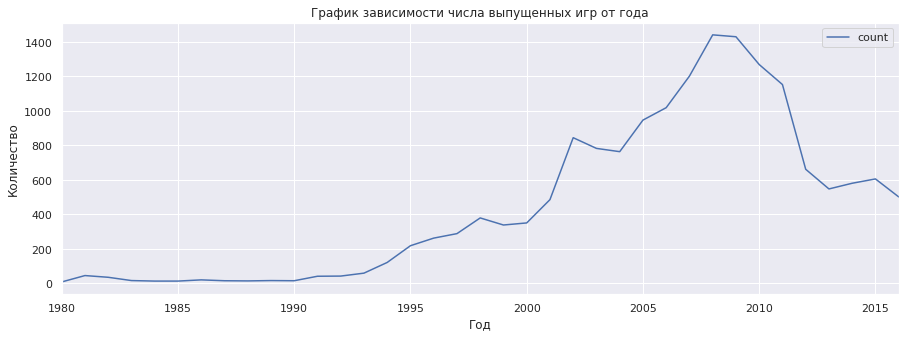

In [38]:
sns.set()
df_year.plot.line(x='year_of_release', y='count',grid=True, figsize=(15,5))
plt.title('График зависимости числа выпущенных игр от года')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

В 80-е годы число выпущенных игр было примерно одинаковым, видимо, из-за слабой доступности устройств  
В 90-е наблюдается активный подъем, по-видимому, связанный с ростом числа устройств  
В 2000-е рынок активно растет, с небольшим разрывом после 2002, но потом рост восстанавливается  
После 2008-2009 годов начался резкий спад, вероятно, связанный с Мировым экономическим кризисом, но после 2013 постепенно вышел на своего рода плато

### Изменение продаж по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Составим сводную таблицу для продаж по платформам

In [39]:
df_platform = df.pivot_table(
    index='year_of_release', 
    columns='platform',
    values='total_sales', 
    aggfunc=['sum'])\
    .droplevel(0, axis=1)

df_platform.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По полученным данным построим heatmap

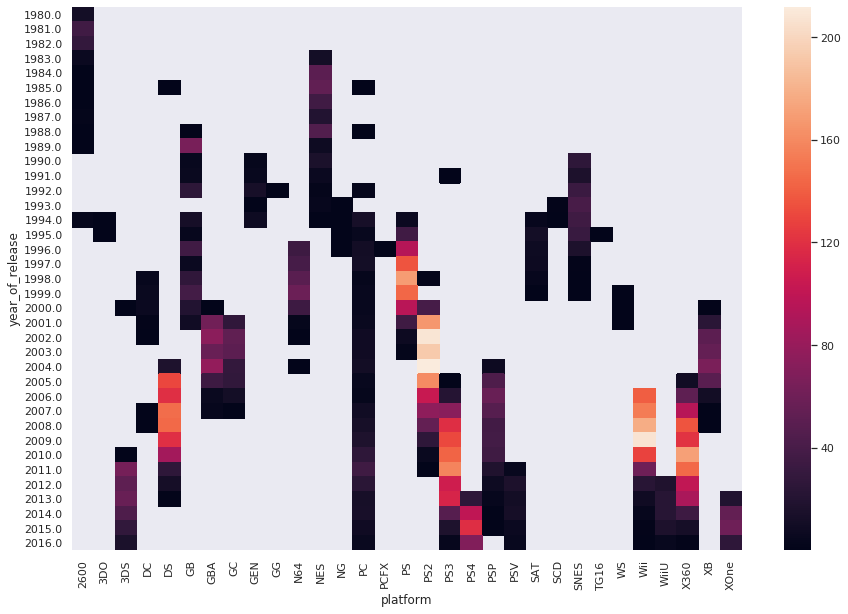

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df_platform)

Теперь получим сводную таблицу по платформам без учета года

In [41]:
df_top_platform = df.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc=['sum'])\
    .droplevel(0, axis=1).sort_values(by='total_sales', ascending=False)

df_top_platform.head(11)

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Получается, в топ-10 войдут значения выше 258.53 (оно на 11 месте)

In [42]:
platform_top10 = df_top_platform.loc[ df_top_platform['total_sales'] > 258.53].index.tolist()
platform_top10

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC']

Получили список с топ-10 платформ, теперь построим гистограмму по этому списку

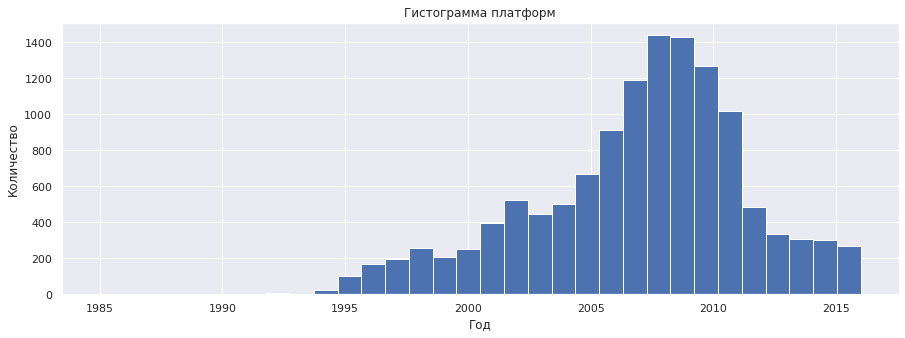

In [43]:
df_platform_top10 = df.query('platform in @platform_top10')
df_platform_top10['year_of_release'].hist(bins=32, figsize=(15,5))
plt.title('Гистограмма платформ')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Получим значения годов существования платформ и визуализируем эти данные

In [44]:
df_top10_year = (df_platform_top10.groupby('platform')['year_of_release'].max() - 
                 df_platform_top10.groupby('platform')['year_of_release'].min()).to_frame().reset_index()
df_top10_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
platform           10 non-null object
year_of_release    10 non-null float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


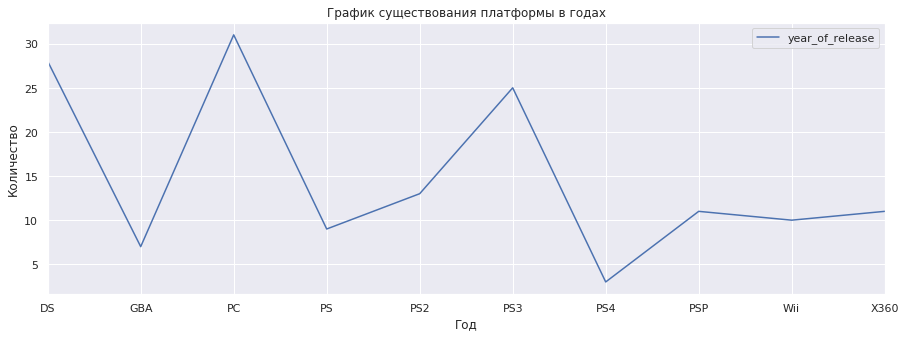

In [45]:
df_top10_year.plot.line(x='platform', y='year_of_release', grid=True, figsize=(15,5))
plt.title('График существования платформы в годах')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

А также рассчитаем числовое значение

In [46]:
df_top10_year.mean()

year_of_release    14.8
dtype: float64

In [47]:
df_top10_year.median()

year_of_release    11.0
dtype: float64

Получили следующие значения: среднее 14.8 лет, медианное - 11  
Ну смущает значение для PS3 и DS

In [48]:
df_platform_top10.query('platform == "PS3"')['year_of_release'].sort_values().head()

4127    1991.0
7584    2005.0
3268    2006.0
5082    2006.0
3947    2006.0
Name: year_of_release, dtype: float64

In [49]:
df_platform_top10.query('platform == "DS"')['year_of_release'].sort_values().head()

15957    1985.0
14161    2004.0
6578     2004.0
6164     2004.0
8465     2004.0
Name: year_of_release, dtype: float64

Получается, в данные вкралась ошибка, нужно удалить эти значения  
Также в анализе не надо учитывать платформу PC, в силу своей специфики она стоит особняком (тут разве по поколениям процессоров/видеокарт/ОС сегментировать)  
Платформу PS4 тоже следует исключить, т.к. она появилась совсем недавно
Попробуем заново

In [50]:
df_platform_top10 = df_platform_top10.drop(axis=0, index=[15957, 4127])

Теперь снова проведем расчеты, исключив PC

In [51]:
df_platform_top10 = df_platform_top10.query('platform != "PC" and platform != "PS4"')

In [52]:
df_top10_year = (df_platform_top10.groupby('platform')['year_of_release'].max() - 
                 df_platform_top10.groupby('platform')['year_of_release'].min()).to_frame().reset_index()
df_top10_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
platform           8 non-null object
year_of_release    8 non-null float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes


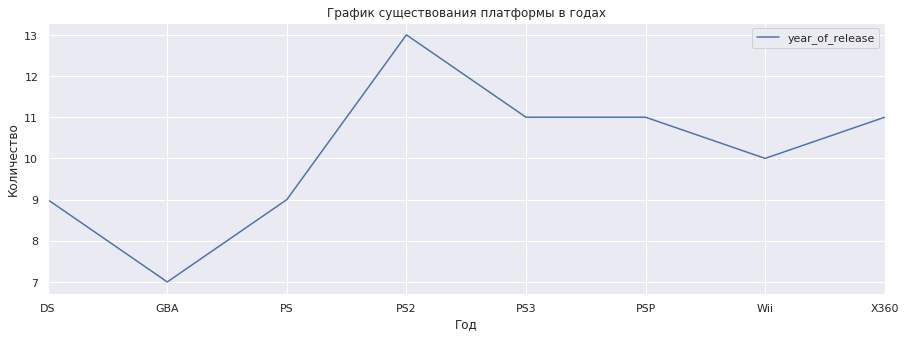

In [53]:
df_top10_year.plot.line(x='platform', y='year_of_release', grid=True, figsize=(15,5))
plt.title('График существования платформы в годах')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Рассчитаем числовое значение

In [54]:
df_top10_year.mean()

year_of_release    10.125
dtype: float64

In [55]:
df_top10_year.median()

year_of_release    10.5
dtype: float64

Получается, средний срок жизни платформы - 10 лет

### Определение актуального периода

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Определим актуальный период 5 лет (половина срока жизни платформы)  
"Живой" будем считать платформу, игры для которой выпускались в последние 3 года  
Таким образом, так как данные есть вплоть до 2016 года, последние игры для платформы должны быть выпущены в 2014-2016 годах, а данные возьмем за 2012-2016 годы

In [56]:
actual_year = 2013
target_year = 2011
platform_exists = df.query('year_of_release > @actual_year')['platform'].unique()
platform_exists

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Получили список актуальных на 2016 год платформ

In [57]:
df_actual = df.query('year_of_release > @target_year and platform in @platform_exists')
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/A,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,N/A,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Получили срез, содержащий игры для актуальных платформ в указанном периоде

### Динамика продаж различных платформ

Какие платформы лидируют по продажам, растут или падают? 

Получим сводную таблицу по продажам актуальных платформ

In [58]:
actual_platform_sales = df_actual.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc=['sum']
).droplevel(1, axis=1).sort_values(by='sum', ascending=False).reset_index()

actual_platform_sales

,platform,sum
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32
5,WiiU,82.19
6,PC,63.51
7,PSV,49.18
8,Wii,36.60
9,PSP,11.69


В тройке лидеров обе PlayStation и Xbox 360  
"Классический" PC плетется в хвосте, а аутсайдером можно признать PSP - скорее всего, потому что в этот период пошли в рост смартфоны с Android и iOS

In [64]:
df_actual_sales = df_actual.query('year_of_release > @actual_year').pivot_table(    
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc=['sum']
).droplevel(0, axis=1)
df_actual_sales

year_of_release,2014.0,2015.0,2016.0
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


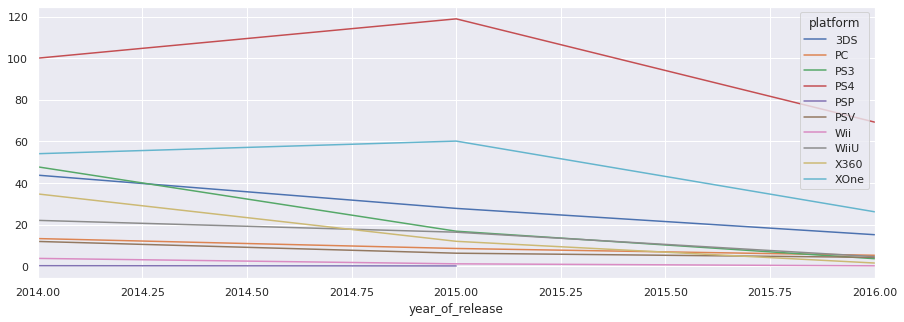

In [65]:
df_actual_sales.T.plot.line(grid=True, figsize=(15,5))

По графику видно, что платформы XOne и PS4, начав с впечатляющих результатов, после 2015 начали довольно резкое падение  
Платформа PSP в итоге вообще прекратила свое существование  
Остальные платформы вышли на плато примерно на одном и том же уровне

### Глобальные продажи игр в разбивке по платформам

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

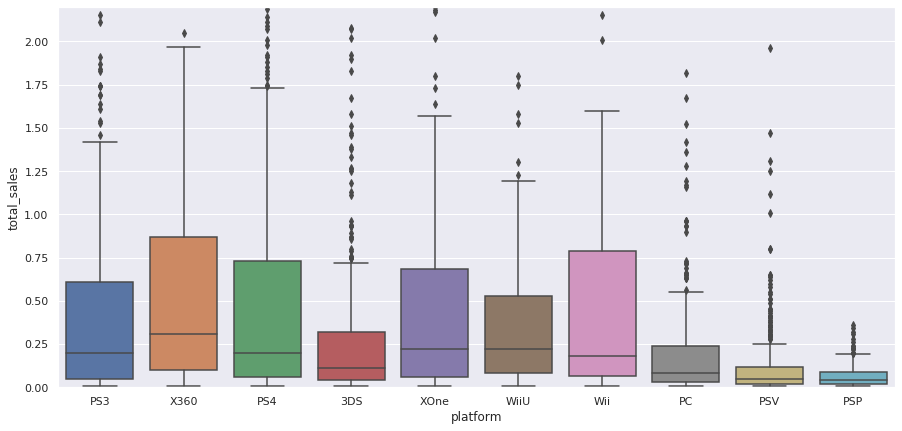

In [123]:
plt.ylim(0, 2.2)
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x= df_actual['platform'], y= df_actual['total_sales'])

У всех платформ наблюдаются выбросы, видимо, какие-то топовые популярные игры  
Графики подтверждают озвученные выше выводы

### Влияние отзывов пользователей и критиков на продажи

#### Внутри одной популярной платформы

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве популярной платформы выберем PS3

In [67]:
df_pc = df_actual.query('platform == "PS3"').filter(['total_sales', 'critic_score', 'user_score'])

Вычислим корреляцию для этой платформы

In [68]:
df_pc.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.331371,-0.005043
critic_score,0.331371,1.000000,0.539525
user_score,-0.005043,0.539525,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0629ce8b10>,
      dtype=object)

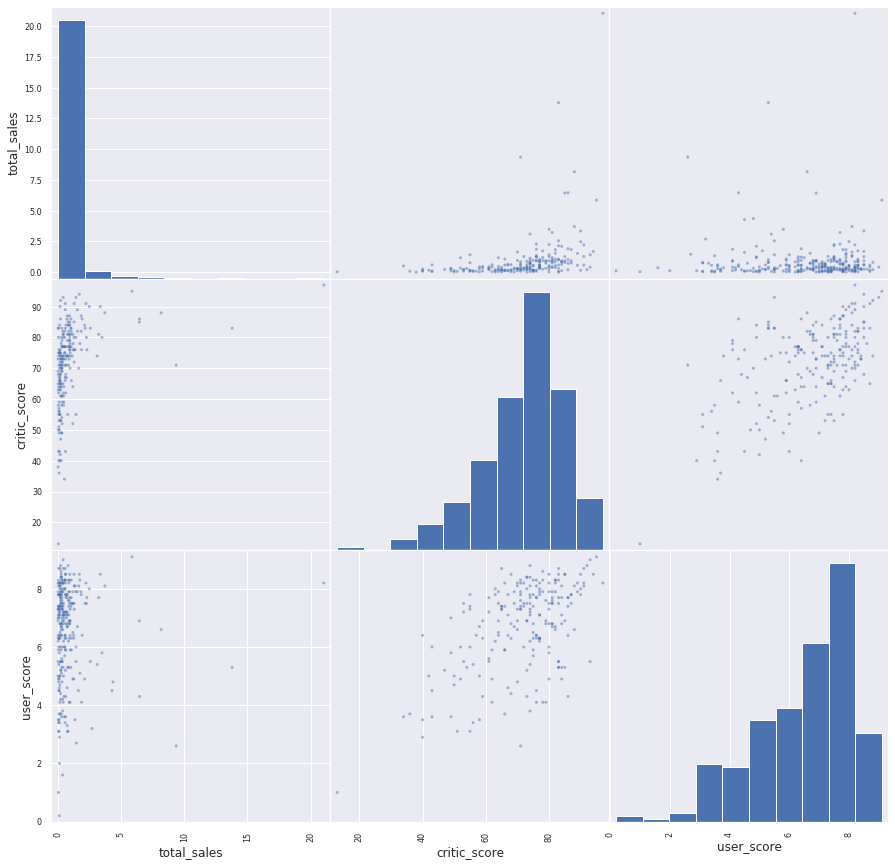

In [69]:
pd.plotting.scatter_matrix(df_pc, figsize=(15, 15), grid=True)

У total_sales и critic_score существует слабая корреляция, по графику видно, что влияние проявляется только в самом верху рейтинга  
У total_sales и user_score корреляция отсуствует  
Получается, к критикам покупали как-то прислушиваются только в случае высокого рейтинга, мнением других пользователей не интересуются вообще  
При этом оценки пользователей и критиков имеют взаимосвязь

#### Внутри других платформ

Соотнесите выводы с продажами игр на других платформах.

In [70]:
df_other = df_actual.query('platform == "PS4"').filter(['total_sales', 'critic_score', 'user_score'])

In [71]:
df_other.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0623978690>,
      dtype=object)

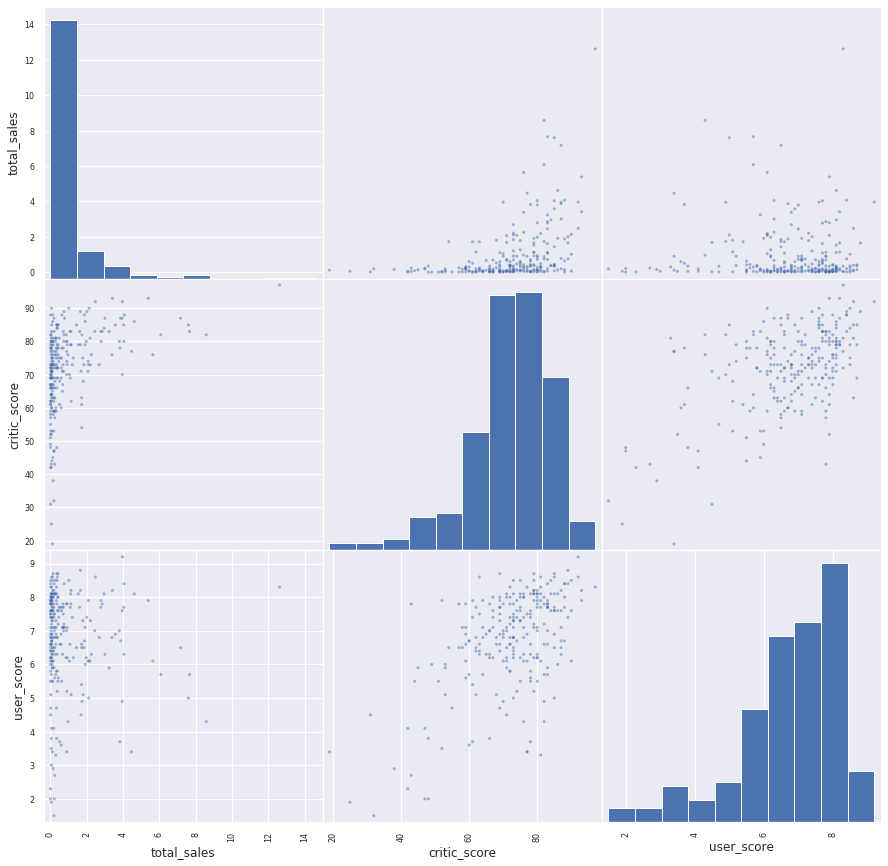

In [72]:
pd.plotting.scatter_matrix(df_other, figsize=(15, 15), grid=True)

In [73]:
df_other = df_actual.query('platform == "X360"').filter(['total_sales', 'critic_score', 'user_score'])

In [74]:
df_other.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.360266,0.006315
critic_score,0.360266,1.000000,0.557952
user_score,0.006315,0.557952,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06515a1390>,
      dtype=object)

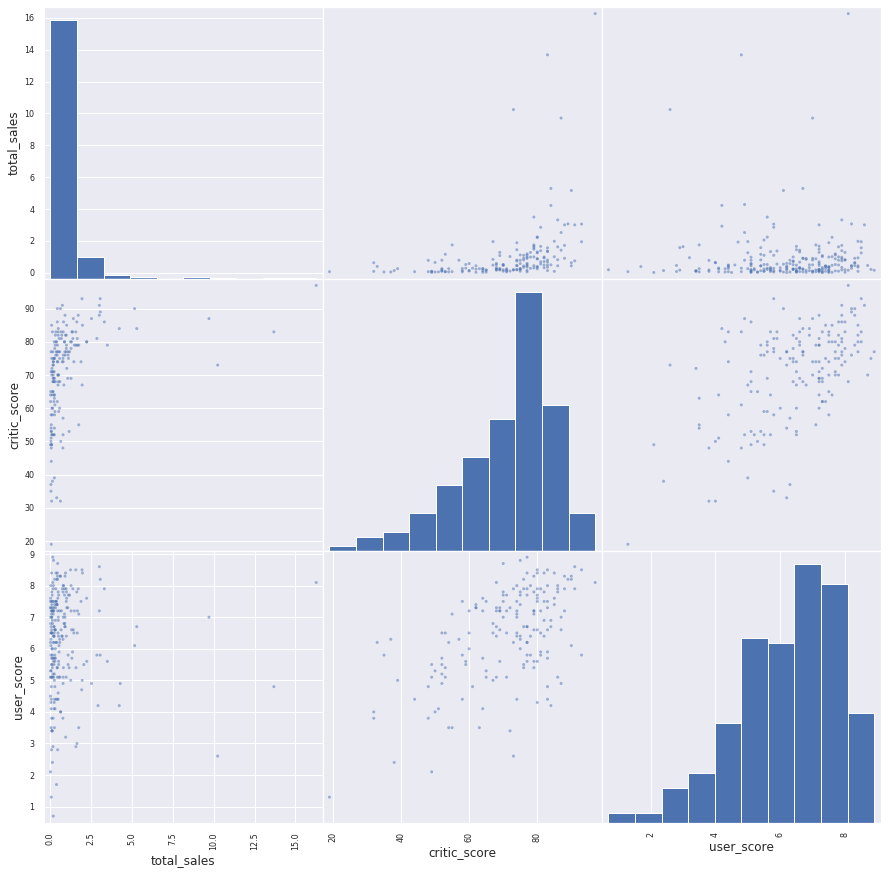

In [75]:
pd.plotting.scatter_matrix(df_other, figsize=(15, 15), grid=True)

Для других платформ результаты практически не отличаются

### Общее распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассчитаем количество игр, выпущенных в разных жанрах

In [76]:
df_actual.pivot_table(
    index='genre',
    values='name',
    aggfunc=['count']
).droplevel(1, axis=1).sort_values(by='count', ascending=False).reset_index()

,genre,count
0,Action,1025
1,Role-Playing,368
2,Adventure,299
3,Sports,266
4,Shooter,237
5,Misc,191
6,Racing,115
7,Fighting,109
8,Platform,83
9,Simulation,79


Лидером можно признать жанр Action, игр в этом жанре выпущено ненамного меньше, чем в других жанрах из топ-5  
Теперь посмотрим на продажи

In [77]:
df_actual.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=['sum']
).droplevel(1, axis=1).sort_values(by='sum', ascending=False).reset_index()

,genre,sum
0,Action,443.93
1,Shooter,304.75
2,Role-Playing,183.72
3,Sports,180.96
4,Misc,84.80
5,Platform,60.31
6,Racing,53.50
7,Fighting,44.49
8,Simulation,34.91
9,Adventure,29.37


Тут опять же лидирует Action, хотя прибыль у него без такого значительного отрыва, как у количества игр  
При этом на втором месте по прибыли жанр Shooter, который по количеству игр на пятом месте  
Жанр Role-Playing со второго места по количеству игр переходит на третье место по прибыли
Что любопытно, Adventure переходит с третьего места по количеству на 10 по прибыли

In [78]:
df_actual.query('genre == "Shooter"').sort_values(by='total_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/A,14.63
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012.0,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71


In [79]:
df_actual.query('genre == "Shooter"').sort_values(by='total_sales', ascending=False).tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16135,Super Stardust Ultra VR,PS4,2016.0,Shooter,0.00,0.01,0.00,0.0,66.0,6.2,E10+,0.01
16217,DoDonPachi Saidaioujou,X360,2013.0,Shooter,0.00,0.00,0.01,0.0,NaN,NaN,N/A,0.01
16301,Caladrius,X360,2013.0,Shooter,0.00,0.00,0.01,0.0,NaN,NaN,T,0.01
16329,Brothers in Arms: Furious 4,X360,2012.0,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,M,0.01
16448,Inversion,PC,2012.0,Shooter,0.01,0.00,0.00,0.0,59.0,6.7,M,0.01


In [80]:
df_actual.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=['median']
).droplevel(1, axis=1).sort_values(by='median', ascending=False).reset_index()

,genre,median
0,Shooter,0.430
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


## Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Напишем две функции, которые помогут нам выделить топ-5 в каждом регионе и визуализировать полученную информацию

In [81]:
def get_popular(df, index, values, aggfunc):
    return df.pivot_table(
        index=index,
        values=values,
        aggfunc=[aggfunc]
    ).droplevel(1, axis=1).sort_values(by=aggfunc, ascending=False).head().reset_index()

In [82]:
def show_pie(data, labels):
    plt.pie(data, labels = labels,  autopct='%.1f%%', radius=1.5)
    plt.show()

### Самые популярные платформы (топ-5)

#### Северная Америка

In [83]:
na_platform = get_popular(df_actual, 'platform', 'na_sales', 'sum')

na_platform

,platform,sum
0,X360,140.57
1,PS4,108.74
2,PS3,103.74
3,XOne,93.12
4,3DS,55.49


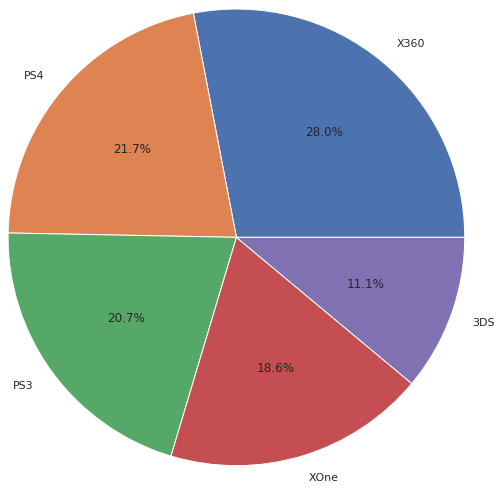

In [84]:
show_pie(na_platform['sum'], na_platform['platform'])

В Америке самые популярные платформы X360, PS4, PS3, XOne и 3DS (в порядке убывания)

#### Европа

In [85]:
eu_platform = get_popular(df_actual, 'platform', 'eu_sales', 'sum')
eu_platform

,platform,sum
0,PS4,141.09
1,PS3,107.27
2,X360,74.89
3,XOne,51.59
4,3DS,42.83


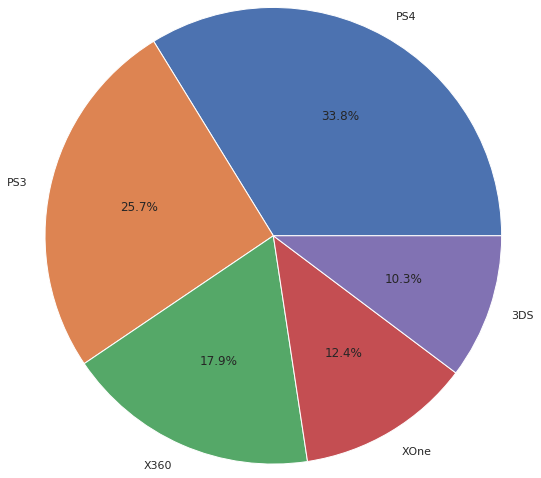

In [86]:
show_pie(eu_platform['sum'], eu_platform['platform'])

В Европе самые популярные платформы те же самые, но топ-3 имеет другое распределение долей

#### Япония

In [87]:
jp_platform = get_popular(df_actual, 'platform', 'jp_sales', 'sum')
jp_platform

,platform,sum
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


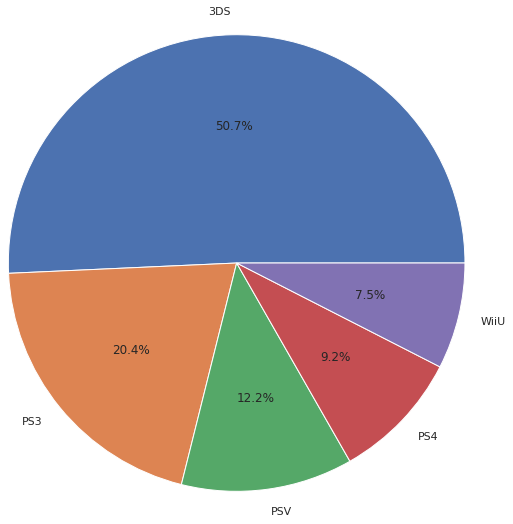

In [88]:
show_pie(jp_platform['sum'], jp_platform['platform'])

Своего рода аутсайдер двух предыдущих регионов 3DS пользуется в Японии бешеной популярностью  
При этом популярные в Европе и Америке X360 и XOne в Японии вообще не входят в топ-5, их место занимают WiiU и PSV

#### Другие регионы

In [89]:
other_platform = get_popular(df_actual, 'platform', 'other_sales', 'sum')

other_platform

,platform,sum
0,PS4,48.35
1,PS3,43.41
2,X360,20.49
3,XOne,14.27
4,3DS,8.90


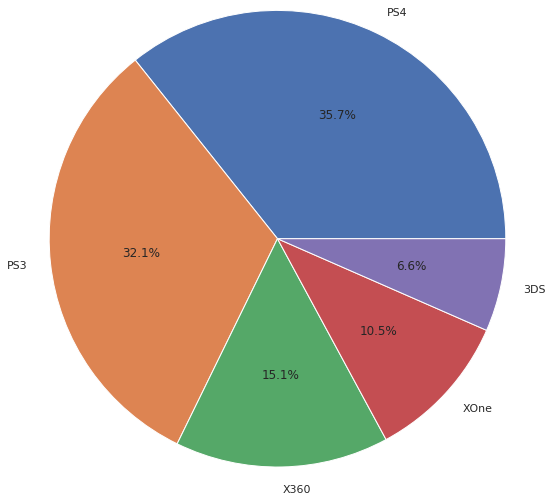

In [90]:
show_pie(other_platform['sum'], other_platform['platform'])

В других регионах популярные платформы те же, что в Европе и Америке, при этом обе PlayStation занимают почти 70% рынка

#### Весь мир

In [91]:
total_platform = get_popular(df_actual, 'platform', 'total_sales', 'sum')

total_platform

,platform,sum
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32


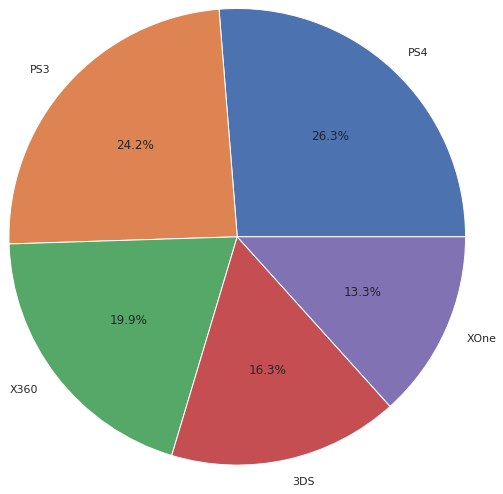

In [92]:
show_pie(total_platform['sum'], total_platform['platform'])

По всему миру платформы такие же, как в отдельных регионах (кроме Японии, где своя атмосфрера), но доли распределены более равномерно  
Но лидеры рынка все равно PlayStation

### Самые популярные жанры (топ-5)

#### Северная Америка

In [93]:
na_genre = get_popular(df_actual, 'genre', 'na_sales', 'sum')

na_genre

,genre,sum
0,Action,179.02
1,Shooter,144.79
2,Sports,81.46
3,Role-Playing,60.65
4,Misc,38.13


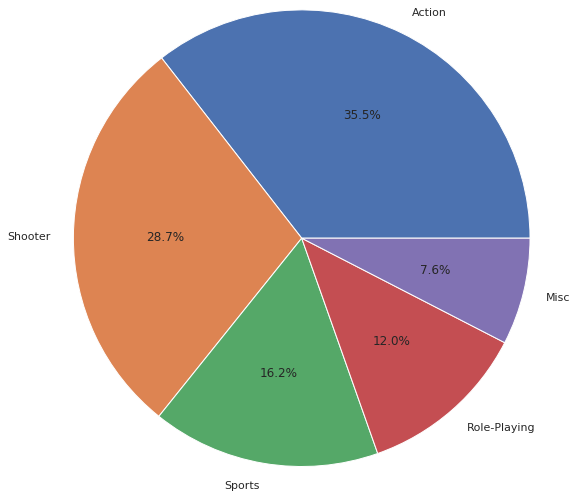

In [94]:
show_pie(na_genre['sum'], na_genre['genre'])

В Америке самые популярные жанры Action, Shooter, Sports, Role-Playing и Misc (в порядке убывания)

#### Европа

In [95]:
eu_genre = get_popular(df_actual, 'genre', 'eu_sales', 'sum')
eu_genre

,genre,sum
0,Action,160.74
1,Shooter,113.47
2,Sports,69.06
3,Role-Playing,46.76
4,Racing,27.29


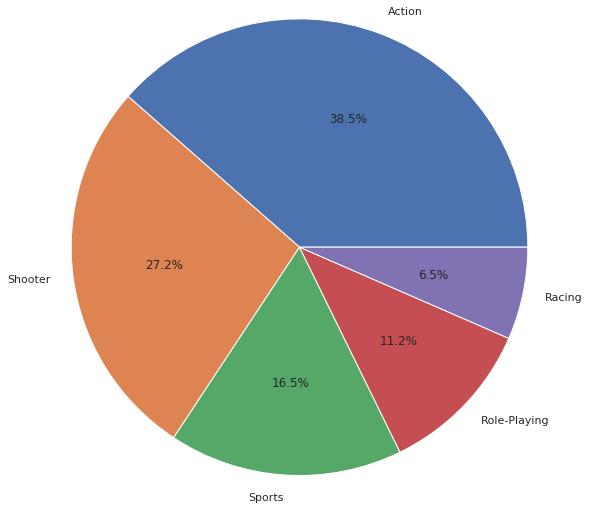

In [96]:
show_pie(eu_genre['sum'], eu_genre['genre'])

Европа очень похожа на Америку, разве что непонятный Misc заменили гонки

#### Япония

In [97]:
jp_genre = get_popular(df_actual, 'genre', 'jp_sales', 'sum')
jp_genre

,genre,sum
0,Role-Playing,61.93
1,Action,52.60
2,Misc,13.10
3,Simulation,10.41
4,Fighting,9.44


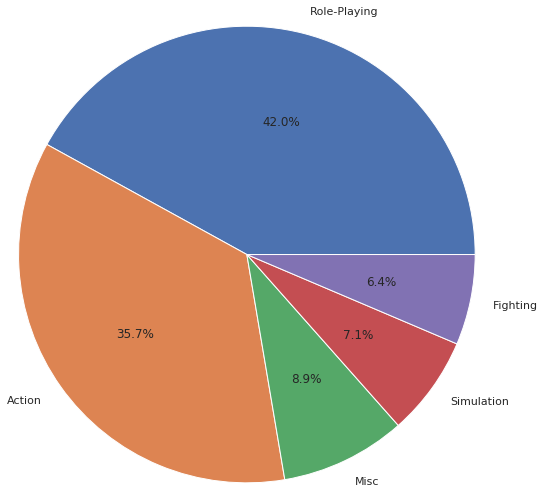

In [98]:
show_pie(jp_genre['sum'], jp_genre['genre'])

Как водится, в Японии все на свой лад, хотя Action там тоже уважают

#### Другие регионы

In [99]:
other_genre = get_popular(df_actual, 'genre', 'other_sales', 'sum')

other_genre

,genre,sum
0,Action,51.57
1,Shooter,37.26
2,Sports,22.43
3,Role-Playing,14.38
4,Misc,7.62


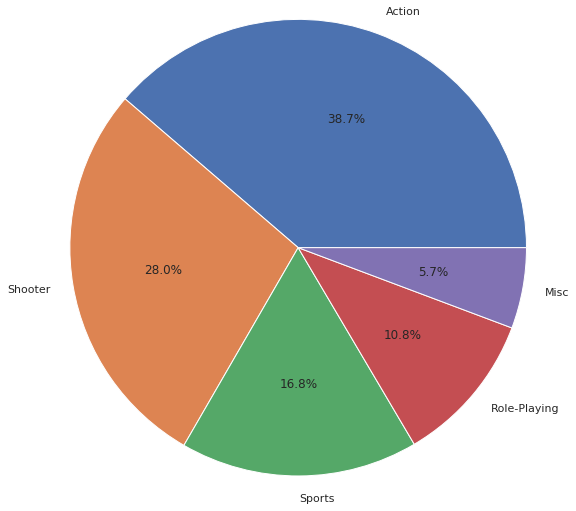

In [100]:
show_pie(other_genre['sum'], other_genre['genre'])

В других регионах тенденции те же, что в Европе и Америке

#### Весь мир

In [101]:
total_genre = get_popular(df_actual, 'genre', 'total_sales', 'sum')

total_genre

,genre,sum
0,Action,443.93
1,Shooter,304.75
2,Role-Playing,183.72
3,Sports,180.96
4,Misc,84.80


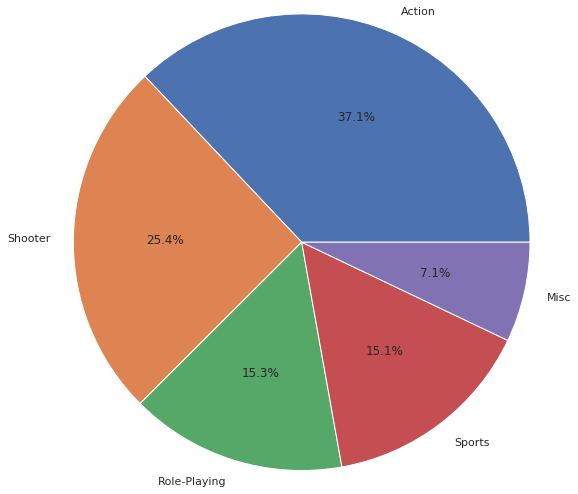

In [102]:
show_pie(total_genre['sum'], total_genre['genre'])

И в целом по миру тенденции те же

### Влияние рейтинга ESRB на продажи

* E - Everyone
* T - Teen
* M - Mature
* E10+ - Everyone 10 and older
* N/A - Not available

#### Северная Америка

In [103]:
na_rating = get_popular(df_actual, 'rating', 'na_sales', 'sum')

na_rating

,rating,sum
0,M,242.34
1,E,116.99
2,N/A,80.12
3,E10+,79.12
4,T,69.80


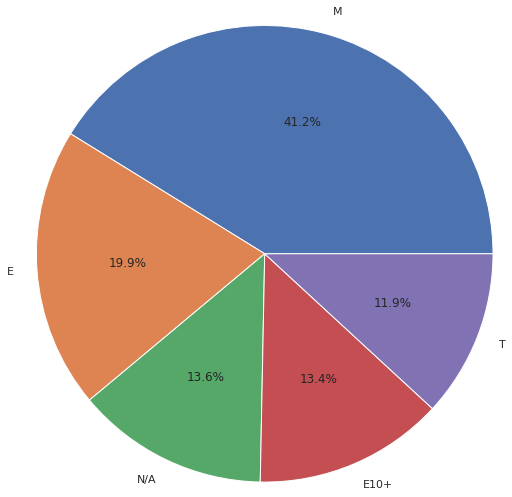

In [104]:
show_pie(na_rating['sum'], na_rating['rating'])

Первое место у рейтинга M, видимо, те самые шутеры и экшны

#### Европа

In [105]:
eu_rating = get_popular(df_actual, 'rating', 'eu_sales', 'sum')
eu_rating

,rating,sum
0,M,206.43
1,E,114.58
2,N/A,68.33
3,E10+,59.02
4,T,57.04


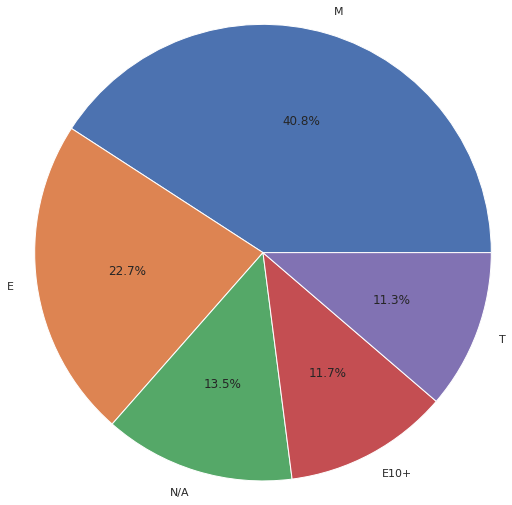

In [106]:
show_pie(eu_rating['sum'], eu_rating['rating'])

Рынки Европы и Америки практически не отличаются друг от друга

#### Япония

In [107]:
jp_rating = get_popular(df_actual, 'rating', 'jp_sales', 'sum')
jp_rating

,rating,sum
0,N/A,99.91
1,T,29.13
2,E,28.90
3,M,22.59
4,E10+,8.57


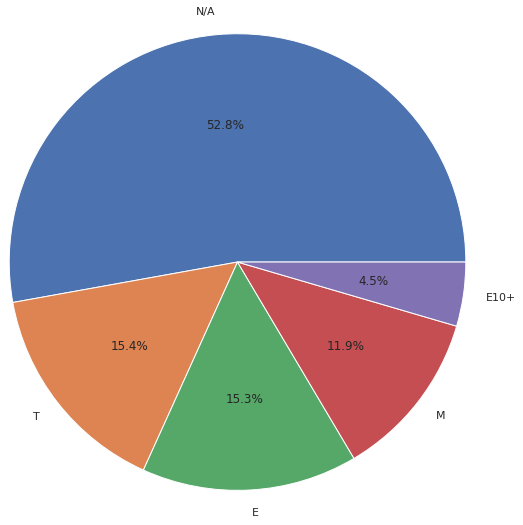

In [108]:
show_pie(jp_rating['sum'], jp_rating['rating'])

По поводу Японии и сказать нечего, N/A оно и есть N/A

#### Другие регионы

In [109]:
other_rating = get_popular(df_actual, 'rating', 'other_sales', 'sum')

other_rating

,rating,sum
0,M,67.27
1,E,31.95
2,N/A,20.02
3,T,19.51
4,E10+,17.25


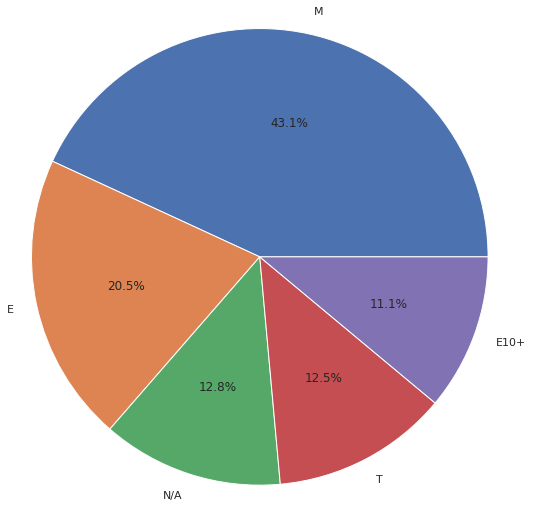

In [110]:
show_pie(other_rating['sum'], other_rating['rating'])

#### Весь мир

In [111]:
total_rating = get_popular(df_actual, 'rating', 'total_sales', 'sum')

total_rating

,rating,sum
0,M,538.63
1,E,292.42
2,N/A,268.38
3,T,175.48
4,E10+,163.96


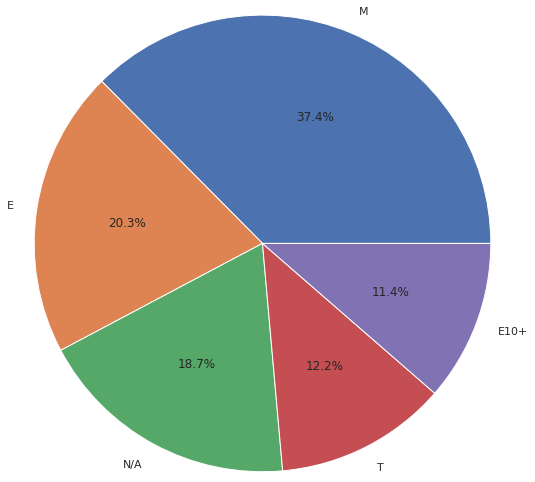

In [112]:
show_pie(total_rating['sum'], total_rating['rating'])

Как и ожидалось, остальные регионы и мир в целом похожи на Америку и Европу

## Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

Когда генеральных совокупностей две, бывает нужно сопоставить их средние.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind().

Методу передают параметры: array1 , array2 — массивы, содержащие выборки; equal_var — необязательный параметр, задающий считать ли равными дисперсии выборок.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:  
* H0 = средние пользовательские рейтинги платформ равны
* H1 = средние пользовательские рейтинги платформ различаются

Получим данные по платформе и избавимся от пропусков

In [113]:
xbox = df_actual.query('platform == "XOne"')['user_score'].dropna()
pc = df_actual.query('platform == "PC"')['user_score'].dropna()

In [114]:
alpha = 0.05

results = st.ttest_ind(
            xbox, pc)

results.pvalue

0.6252774522173157

In [115]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не может быть отвергнута")

Нулевая гипотеза не может быть отвергнута


Раз нулевая гипотеза (средние пользовательские рейтинги платформ равны) не может быть отвергнута, значит, вероятно, что она верна  
Сравним числовые значения

In [116]:
xbox.mean()

6.521428571428572

In [117]:
pc.mean()

6.4454976303317535

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы:
* H0 = средние пользовательские рейтинги жанров равны
* H1 = средние пользовательские рейтинги жанров различаются

In [118]:
action = df_actual.query('genre == "Action"')['user_score'].dropna()
sports = df_actual.query('genre == "Sports"')['user_score'].dropna()

In [119]:
alpha = 0.05

results = st.ttest_ind(
            action, sports)

results.pvalue

1.0333514547651022e-26

In [120]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не может быть отвергнута")

Отвергаем нулевую гипотезу


Раз нулевая гипотеза "средние пользовательские рейтинги жанров равны" отвергается, то получается, что они различаются  
Сравним числовые значения

In [121]:
action.mean()

6.835916824196597

In [122]:
sports.mean()

5.455897435897437

## Общий вывод

В представленных данных:
* У некоторых игр отсутствует год выпуска, часть удалось условно восстановить
* У многих игр (треть датасета) отсутствует рейтинг ESRB, восстановить удалось немного  
* Также отсутствует множество данных о рейтинге у критиков и у пользователей

В 80-е годы на рынке игр выпускалось стабильно, но не очень много игр, в 90-е начался активный рост рынка, но после 2009 рынок пошел на спад

Средний срок жизни платформы - 10 лет, на 2016 год актуальными можно считать следующие платформы:
* PS4
* 3DS
* XOne
* WiiU
* PS3
* X360
* PC
* Wii
* PSV
* PSP  

_При это платформа PSP прекратила свое существование в рассматриваемом периоде(2012-2016), по-видимому, не выдержав конкуренции с рынком смартфонов_

Отзывы критиков имеют слабое влияние на продажи, при этом отзывы пользователей влияния не имеют вообще  
При этом наблюдается взаимосвязь между отзывами критиков и отзывами игроков

Самый популярный и прибыльный жанр - Action

Портреты игроков в Европе, Америке, других регионах и в мире в целом практически не отличаются, при этом особняком стоит Япония - по ней данные совершенно другие

Из списка актуальных платформ к перспективным можно отнести:
* PS4
* 3DS
* X360

PS3 явно будет заменяться на PS4 (я не особо разбираюсь, но на момент написания комментария уже вышла PS-5)  
3DS - большой рынок в Японии и в целом по миру тоже, X360 тоже большой рынок  

Самые популярные жанры:
* Action
* Shooter
* Sports
* Role-Playing

Самые популярные платформы:
* PS3
* PS4
* X360
* 3DS

Самые популярные рейтинги:
* M
* E

N/A тоже популярный, но не очень понятно, что это за игры